<a href="https://colab.research.google.com/github/mattheweisenberg6/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20.1 Numerical Differentiation Problem Statement**

A numerical grid is an evenly spaced set of points over the domain of a function with a step size showing the space between each point. We can take advantage of Python to develop numerical grids. For one dimension grids, we can use the linspace function which is already used for regulary spaced arrays. We can represent a function in Python by computing its value over a grid which creates a discrete view and potential insights into numerical calculations and data sets. We would like to derive methods for approximating the derivative of function f over a numerical grid and determine its accuracy.

**20.2 Finite Difference Approximating Derivatives**

We can use finite difference formulas to approximate the slope of a function. For forward difference, we estimate the slope of the function at xj using the line that connects (xj, f(xj)) and (xj+1, f(xj+1)). For backward difference, we estimate the slope of the function at xj using the line that connects (xj-1, f(xj-1)) and (xj, f(xj)). For central difference, we estimate the slope of the function at xj using the line that connects (xj-1, f(xj-1)) and (xj+1, f(xj+1)). We can also implement the finite difference approximations via Taylor Series.

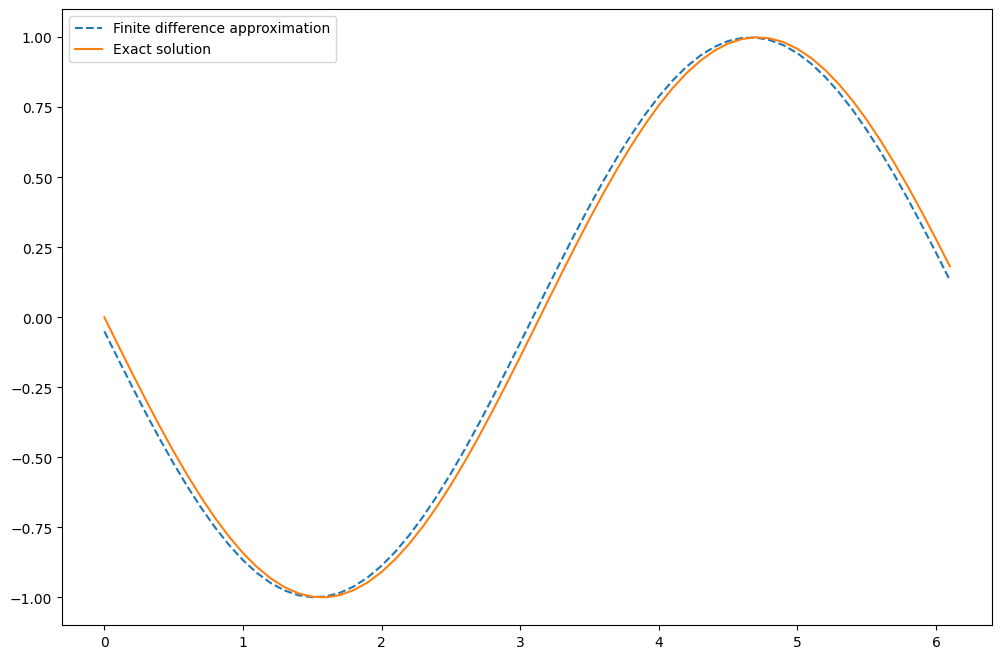

0.049984407218554114


In [1]:
#Using forward difference formula to approximate a derivate in Python

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

The figure shows a small offset between the approximation and exact solution, which shows this a is a good approximation to use.

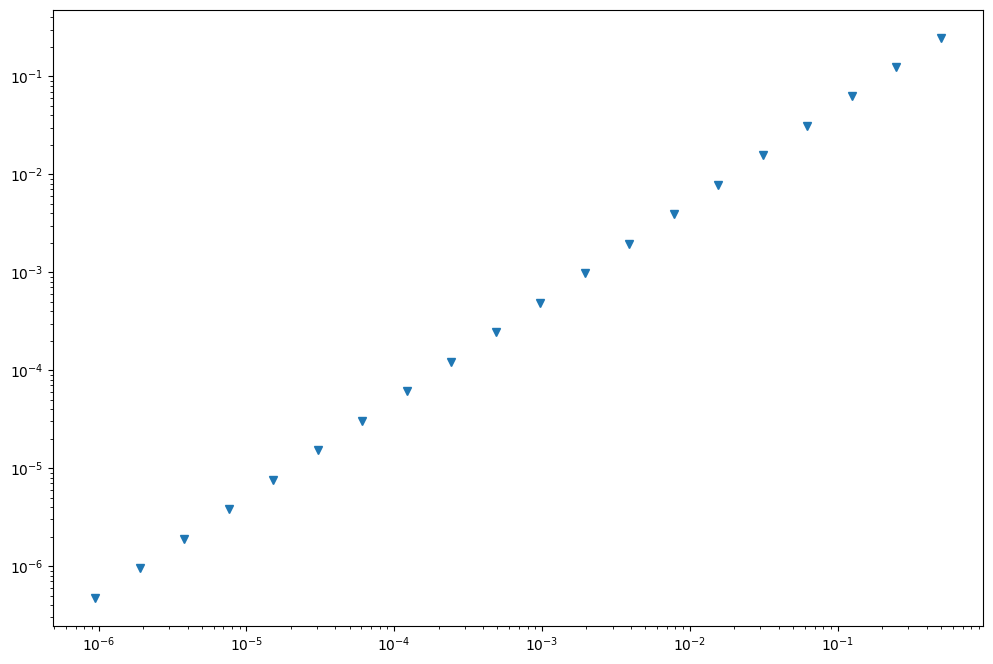

In [2]:
#Example showing the numerical derivate for f(x) = cos(x) w/ forward difference formula
#It will then plot max error between offset and exact solution

# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 2 * np.pi, h)
    # compute function value at grid
    y = np.cos(x)
    # compute vector of forward differences
    forward_diff = np.diff(y)/h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = -np.sin(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

This proves the forward difference formula is O(h).

**20.3 Approximating of Higher Order Derivatives**

We can use Taylor Series to calculate higher order derivatives.

**20.4 Numerical Differentiation with Noise**

Data can be contaminated with noise which means its value can be off slightly than if we used a pure mathemathical function. This occurs in engineering due to inaccuracies in measuring devices or the data can be modified outside the system of interest.

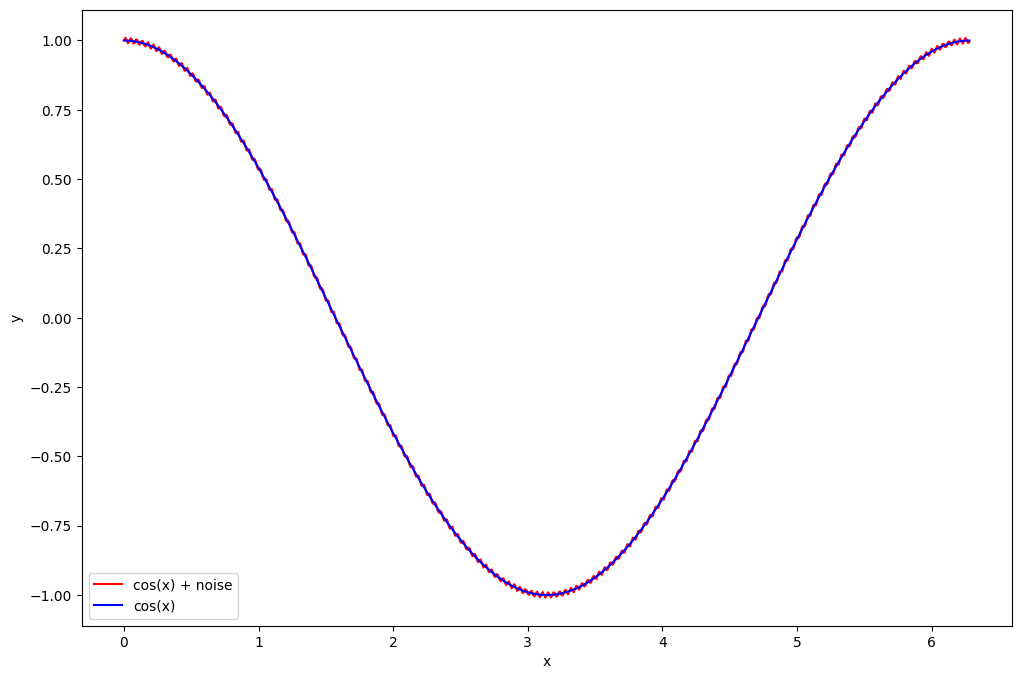

In [3]:
#example with cos(x) and cos(x) + noise
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 150
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

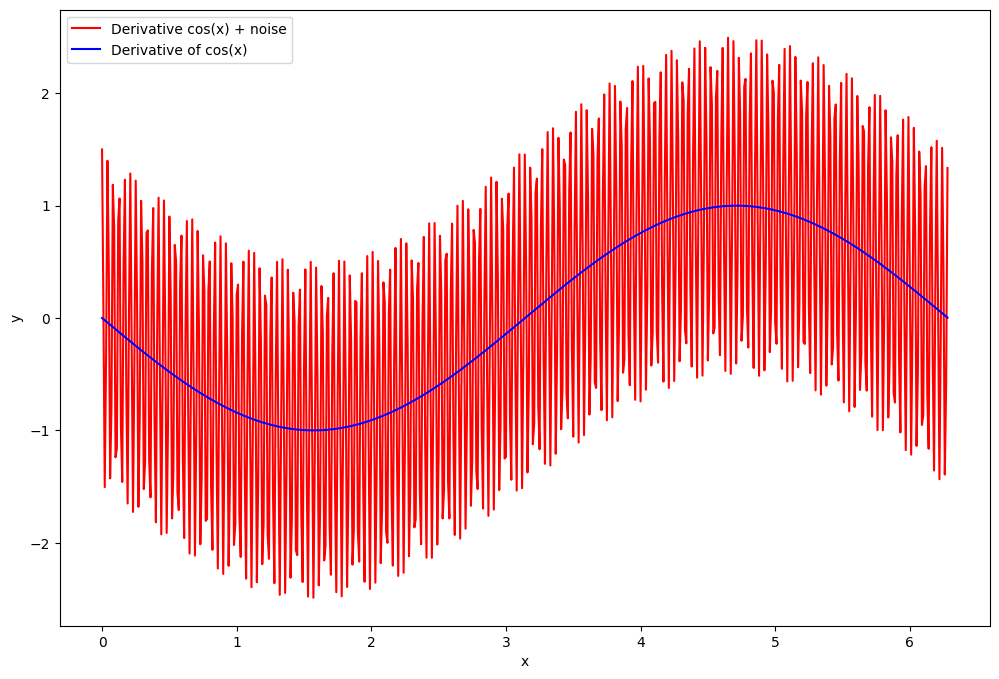

In [4]:
#example with -sin(x) and -sin(x) + noise which may not be small since when omega is large, noise contribution may not be small
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()